### **Quantitative (Numerical) Data Exploratory:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast

***Create Orders Dataframe Depending On Wrang User-Defiend Function***

In [2]:
def wrang(
    dataframe,
    encoding = None,
    dropnanvalues = None,
    duplicatevlues = None,
    datecolumn = None,
    renamedcolumns = None  
):
    # Loading Data From CSV File:
    df = pd.read_csv(dataframe, encoding= encoding)

    # Drop Nan Value Of Specific Columns:
    df.dropna(subset=dropnanvalues, inplace=True)

    # Remove Duplicates From Specific Columns:
    df.drop_duplicates(subset=duplicatevlues, inplace=True)

    # Convert Date Column From Object to Datetime:
    df[datecolumn] = pd.to_datetime(df[datecolumn])

    # Rename Columns Names:
    df.rename(columns= renamedcolumns, inplace=True)

    # Stripe and Lowercase Columns Names:
    df.columns = df.columns.str.strip().str.lower()

    return(df)    

In [3]:
wrang(dataframe="D:\\IT Courses\\Data Analysis Courses\\Data Analysis Projects\\International Sales Company Project\\International_Sales_Database\\Python_Analysis\\1_Data_Cleaning\\Full_Join_Data.csv",
      encoding="ISO-8859-1",
      dropnanvalues=["OrderId"],
      duplicatevlues="OrderId",
      datecolumn="OrderDate", 
      renamedcolumns={"City.1":"SupplierCity", "Country.1":"SupplierCountry", "Phone.1":"SupplierPhone"}
      )

,customerid,firstname,lastname,city,country,phone,orderid,orderdate,ordernumber,totalamount,...,unitprice,package,isdiscontinued,supplierid,companyname,contactname,suppliercity,suppliercountry,supplierphone,fax
0,1.0,Maria,Anders,Berlin,Germany,030-0074321,396.0,2013-08-25,542773.0,1086.00,...,45.60,25 - 825 g cans,True,12.0,Plutzer Lebensmittelgro?m?rkte AG,Martin Bein,Frankfurt,Germany,(069) 992755,NaN
3,1.0,Maria,Anders,Berlin,Germany,030-0074321,445.0,2013-10-03,542822.0,878.00,...,43.90,15 - 625 g jars,False,7.0,"Pavlova, Ltd.",Ian Devling,Melbourne,Australia,(03) 444-2343,(03) 444-6588
4,1.0,Maria,Anders,Berlin,Germany,030-0074321,455.0,2013-10-13,542832.0,330.00,...,10.00,12 - 550 ml bottles,False,1.0,Exotic Liquids,Charlotte Cooper,London,UK,(171) 555-2222,NaN
6,1.0,Maria,Anders,Berlin,Germany,030-0074321,764.0,2014-04-09,543141.0,960.00,...,13.25,24 pieces,False,27.0,Escargots Nouveaux,Marie Delamare,Montceau,France,85.57.00.07,NaN
8,1.0,Maria,Anders,Berlin,Germany,030-0074321,588.0,2014-01-15,542965.0,851.00,...,55.00,5 kg pkg.,False,28.0,Gai pâturage,Eliane Noz,Annecy,France,38.76.98.06,38.76.98.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,91.0,Zbyszek,Piestrzeniewicz,Warszawa,Poland,(26) 642-7012,545.0,2013-12-23,542922.0,399.85,...,19.00,24 - 12 oz bottles,False,1.0,Exotic Liquids,Charlotte Cooper,London,UK,(171) 555-2222,NaN
2149,91.0,Zbyszek,Piestrzeniewicz,Warszawa,Poland,(26) 642-7012,623.0,2014-02-04,543000.0,160.00,...,18.00,24 - 12 oz bottles,False,16.0,Bigfoot Breweries,Cheryl Saylor,Bend,USA,(503) 555-9931,NaN
2151,91.0,Zbyszek,Piestrzeniewicz,Warszawa,Poland,(26) 642-7012,659.0,2014-02-25,543036.0,427.50,...,28.50,24 - 500 ml bottles,False,29.0,Forêts d'érables,Chantal Goulet,Ste-Hyacinthe,Canada,(514) 555-2955,(514) 555-2921
2152,91.0,Zbyszek,Piestrzeniewicz,Warszawa,Poland,(26) 642-7012,751.0,2014-04-03,543128.0,686.00,...,4.50,12 - 355 ml cans,True,10.0,Refrescos Americanas LTDA,Carlos Diaz,Sao Paulo,Brazil,(11) 555 4640,NaN


In [4]:
orders = wrang(dataframe="D:\\IT Courses\\Data Analysis Courses\\Data Analysis Projects\\International Sales Company Project\\International_Sales_Database\\Python_Analysis\\1_Data_Cleaning\\Full_Join_Data.csv",
               encoding="latin-1",
               dropnanvalues=["OrderId"],
               duplicatevlues="OrderId",
               datecolumn="OrderDate",
               renamedcolumns={"City.1":"SupplierCity", "Country.1":"SupplierCountry", "Phone.1":"SupplierPhone"})

In [5]:
columns_edit = ["customerid", "orderid", "ordernumber", "productid", "supplierid"]
for column in list(orders.columns):
    if column in columns_edit:
        orders[column] = orders[column].astype(int)


In [6]:
orders = orders[["customerid", "firstname", "lastname", "city", "country", "orderid", "ordernumber", "orderdate", "totalamount"]]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 2156
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   830 non-null    int64         
 1   firstname    830 non-null    object        
 2   lastname     830 non-null    object        
 3   city         830 non-null    object        
 4   country      830 non-null    object        
 5   orderid      830 non-null    int64         
 6   ordernumber  830 non-null    int64         
 7   orderdate    830 non-null    datetime64[ns]
 8   totalamount  830 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 64.8+ KB


***Exploratory Data Analysis (EDA):***

**1- Univariate Analysis Step:**

**1.1.Analysis Quantitative Column In The Data (totalamount):**

In [7]:
orders["totalamount"].describe()

count      830.000000
mean      1631.877819
std       1990.613963
min         12.500000
25%        480.000000
50%       1015.900000
75%       2028.650000
max      17250.000000
Name: totalamount, dtype: float64

**Data Shape Using (Histogram):**

**Histogram:**

**1-Using Plot( ) Function of Pandas Library:**

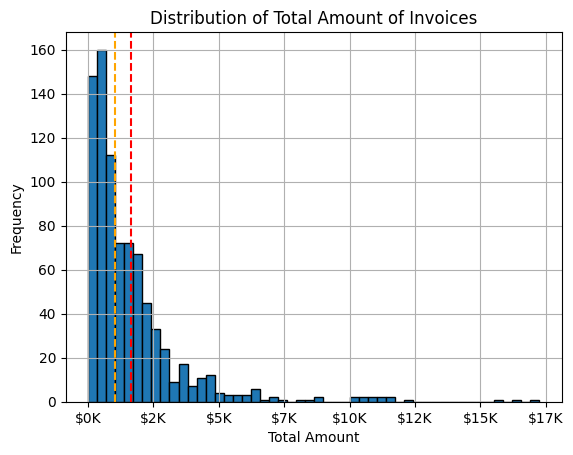

In [8]:
fig, ax = plt.subplots()

def moneyFormat(x, position):
    return(f"${int(x / 1000)}K")

orders["totalamount"].plot(kind="hist", bins=50, edgecolor='black')
plt.title("Distribution of Total Amount of Invoices")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.axvline(x=orders["totalamount"].mean(), color="red", linestyle="--")
plt.axvline(x=orders["totalamount"].median(), color="orange", linestyle="--")

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(moneyFormat))

**2-Using Matplotlib Library:**

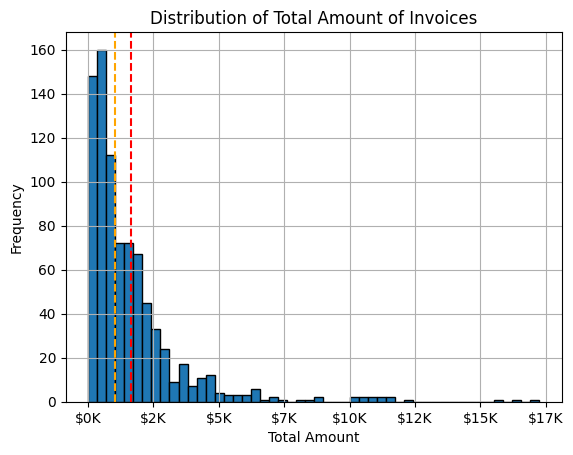

In [9]:
fig, ax = plt.subplots()

def moneyFormat(x, position):
    return(f"${int(x / 1000)}K")

plt.hist(data=orders, x="totalamount", bins=50, edgecolor="black")
plt.title("Distribution of Total Amount of Invoices")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.axvline(x=orders["totalamount"].mean(), color="red", linestyle="--")
plt.axvline(x=orders["totalamount"].median(), color="orange", linestyle="--")

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(moneyFormat))

**3-Using Seaborn Library:**

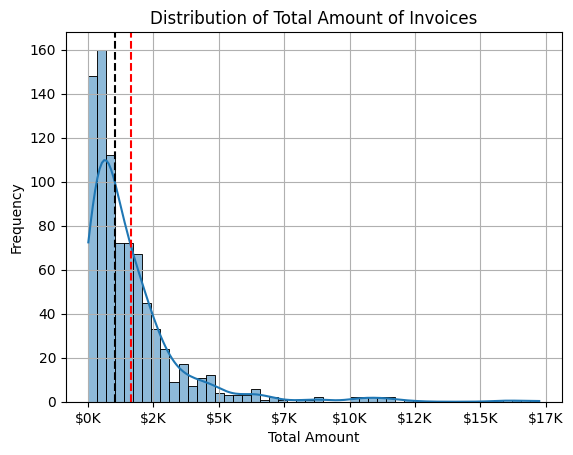

In [10]:
fig, ax = plt.subplots()

def moneyFormat(x, position):
    return(f"${int(x / 1000)}K")

sns.histplot(data=orders, x="totalamount", bins=50, kde=True, edgecolor="black")
plt.title("Distribution of Total Amount of Invoices")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.axvline(x=orders["totalamount"].mean(), color="red", linestyle="--")
plt.axvline(x=orders["totalamount"].median(), color="black", linestyle="--")

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(moneyFormat))

**Histogram Shape Analysis:**

- First, the shape of the curve is (Right-Skewed) or (Positive-Skewed).

- In this case, the mean is more than the median (mean > median).

- We note that most of our data in the histogram is concentrated in the left side.

- We note that the median (black line) is closer to most data on the left side.

- Unlike mean which is closer to higher values data which is right skewed of the curve.

- So, the median in this case is more accurate and can be used in measure of the center.

**Five Number Summary: (Min - Q1 - Median(Q2) - Q3 - Max) Using (Box Plot)**

In [11]:
Min = orders["totalamount"].min()
Q1 = orders["totalamount"].quantile(0.25)
Q2 = orders["totalamount"].median()
Q3 = orders["totalamount"].quantile(0.75)
Max = orders["totalamount"].max()

In [12]:
IQR = Q3 - Q1
lower_boundary = Q1 - (1.5 * IQR)
upper_boundary = Q3 + (1.5 * IQR)

In [13]:
print(
    Min,
    Q1,
    Q2,
    Q3,
    Max,
    IQR,
    lower_boundary,
    upper_boundary
)

12.5 480.0 1015.9 2028.65 17250.0 1548.65 -1842.9750000000004 4351.625


**Box Plot:**

**1- Using Seaborn Library:**

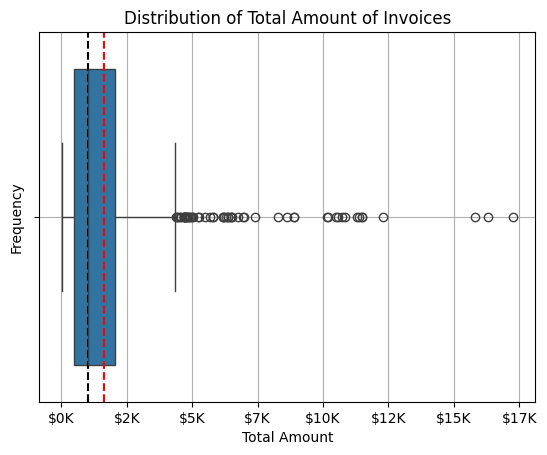

In [14]:
fig, ax = plt.subplots()

def moneyFormat(x, position):
    return(f"${int(x / 1000)}K")

sns.boxplot(data=orders, x="totalamount")
plt.title("Distribution of Total Amount of Invoices")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.axvline(x=orders["totalamount"].mean(), color="red", linestyle="--")
plt.axvline(x=orders["totalamount"].median(), color="black", linestyle="--")

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(moneyFormat))

**2- Using Plotly Library:**

In [15]:
px.box(data_frame=orders, x="totalamount")

**Outliers:**

In [16]:
print(f"Total Number of Rows >= Upper Boundary = {orders[orders["totalamount"] >= upper_boundary].shape[0]} Rows")
print(f"Total Number of Rows <= Lower Boundary = {orders[orders["totalamount"] <= lower_boundary].shape[0]} Rows")

Total Number of Rows >= Upper Boundary = 56 Rows
Total Number of Rows <= Lower Boundary = 0 Rows


**Box Plot Analysis:**

- From the box plot and five-number summary analysis, we note that the upper boundary is almost equal = 4351.625.

- The number of rows (invoices) that are bigger or equal to the upper boundary is 56 rows (invoices).

- In fact, I see that 56 rows to be considered outliers is not correct compared to the total number of rows of the dataframe (830).

- The second reason is due to the values from 4K to 15K are close together, which means that the difference between them is small.

- In this case, I will consider that values more than 15K are considered outliers, as their values are differentiated more.

**Combination Of Histogram Chart and Box Plot Chart Showing Invoices Amount Distribution**

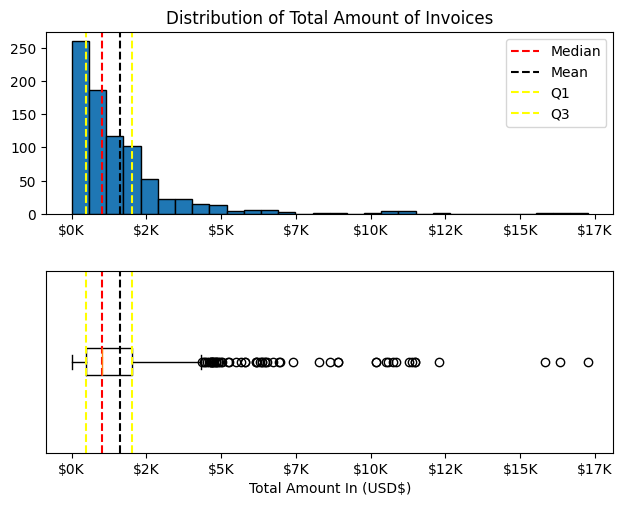

In [17]:
fig, ax = plt.subplots(2,1)
fig.tight_layout(h_pad=2)

def salaryFormat(x, position):
    return(f"${int(x / 1000)}K")

ax[0].hist(x=orders["totalamount"], bins=30, edgecolor="black")
ax[0].set_title("Distribution of Total Amount of Invoices")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(salaryFormat))
ax[0].axvline(x=(orders["totalamount"]).median(), color="red", linestyle="--", label="Median")
ax[0].axvline(x=(orders["totalamount"]).mean(), color="black", linestyle="--", label="Mean")
ax[0].axvline(x=(orders["totalamount"]).quantile(0.25), color="yellow", linestyle="--", label="Q1")
ax[0].axvline(x=(orders["totalamount"]).quantile(0.75), color="yellow", linestyle="--", label="Q3")
ax[0].legend(loc="upper right")

ax[1].boxplot(x=orders["totalamount"], vert=False)
ax[1].set_yticks([])
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(salaryFormat))
ax[1].set_xlabel("Total Amount In (USD$)")
ax[1].axvline(x=(orders["totalamount"]).median(), color="red", linestyle="--")
ax[1].axvline(x=(orders["totalamount"]).mean(), color="black", linestyle="--")
ax[1].axvline(x=(orders["totalamount"]).quantile(0.25), color="yellow", linestyle="--")
ax[1].axvline(x=(orders["totalamount"]).quantile(0.75), color="yellow", linestyle="--")


**Dealing With Ouliers:**

In [18]:
print(f"Total Number of Rows >= Upper Boundary = {orders[orders["totalamount"] >= 15000].shape[0]} Rows")

Total Number of Rows >= Upper Boundary = 3 Rows


In [19]:
orders = orders[orders["totalamount"] < 15000]

In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 0 to 2156
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   827 non-null    int64         
 1   firstname    827 non-null    object        
 2   lastname     827 non-null    object        
 3   city         827 non-null    object        
 4   country      827 non-null    object        
 5   orderid      827 non-null    int64         
 6   ordernumber  827 non-null    int64         
 7   orderdate    827 non-null    datetime64[ns]
 8   totalamount  827 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 64.6+ KB


In [21]:
orders.to_csv("Orders_Dataframe.csv", index=False)